Upload train.csv:


Saving train_data.csv to train_data (2).csv

Upload val.csv:


Saving val_data.csv to val_data (2).csv

Upload test.csv:


Saving test_data.csv to test_data (2).csv

Using column: Tail_Risk_Event

TAIL-RISK DISTRIBUTION
Train: 7,570 / 108,087 (7.00%)
Val: 2,272 / 69,993 (3.25%)
Test: 3,275 / 83,035 (3.94%)

Tail-risk events:
      Coin        Date  Next_Day_Return  Tail_Risk_Event
3    1INCH  2021-07-15          -0.0852                1
6    1INCH  2021-07-18          -0.1310                1
42   1INCH  2021-08-23          -0.1047                1
44   1INCH  2021-08-25          -0.0812                1
56   1INCH  2021-09-06          -0.2404                1
69   1INCH  2021-09-19          -0.1424                1
70   1INCH  2021-09-20          -0.0970                1
73   1INCH  2021-09-23          -0.0884                1
107  1INCH  2021-10-27          -0.0972                1
126  1INCH  2021-11-15          -0.0816                1

Normal events:
     Coin        Date  Next_Day_Return  Tail_Risk_Event
0   1INCH  2021-07-12          -0.0448                0
1   1INCH  2021-07-13          -0.0103   

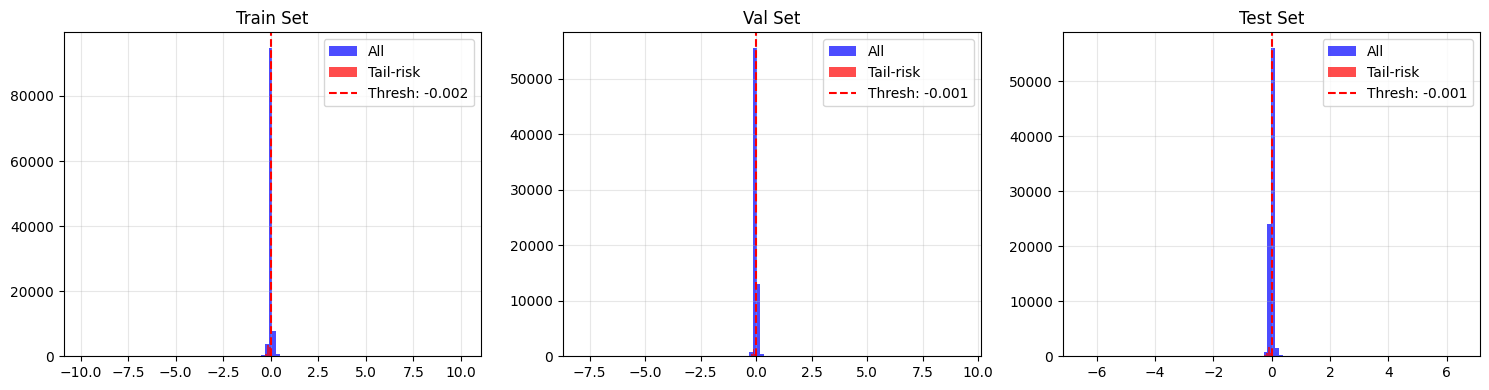

In [ ]:
# TAIL-RISK VERIFICATION SCRIPT FOR GOOGLE COLAB
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload files
print("Upload train.csv:")
uploaded = files.upload()
train = pd.read_csv(list(uploaded.keys())[0])

print("\nUpload val.csv:")
uploaded = files.upload()
val = pd.read_csv(list(uploaded.keys())[0])

print("\nUpload test.csv:")
uploaded = files.upload()
test = pd.read_csv(list(uploaded.keys())[0])

# Find tail-risk column
tail_cols = [col for col in train.columns if 'tail' in col.lower() or 'risk' in col.lower()]
tail_col = tail_cols[0] if tail_cols else 'Tail_Risk_Event'
print(f"\nUsing column: {tail_col}")

# Check distribution
print("\n" + "="*60)
print("TAIL-RISK DISTRIBUTION")
print("="*60)
for name, data in [('Train', train), ('Val', val), ('Test', test)]:
    pct = data[tail_col].mean() * 100
    print(f"{name}: {data[tail_col].sum():,} / {len(data):,} ({pct:.2f}%)")

# Show examples
print("\nTail-risk events:")
print(train[train[tail_col]==1][['Coin','Date','Next_Day_Return',tail_col]].head(10))

print("\nNormal events:")
print(train[train[tail_col]==0][['Coin','Date','Next_Day_Return',tail_col]].head(10))

# Find thresholds
implied = train[train[tail_col]==1].groupby('Coin')['Next_Day_Return'].max()
actual_5th = train.groupby('Coin')['Next_Day_Return'].quantile(0.05)

print("\nImplied thresholds per coin:")
print(implied.sort_values())

print("\nActual 5th percentile:")
print(actual_5th.sort_values())

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, (data, name) in enumerate([(train, 'Train'), (val, 'Val'), (test, 'Test')]):
    ax = axes[idx]
    ax.hist(data['Next_Day_Return'], bins=100, alpha=0.7, color='blue', label='All')
    ax.hist(data[data[tail_col]==1]['Next_Day_Return'], bins=100, alpha=0.7, color='red', label='Tail-risk')
    threshold = data[data[tail_col]==1]['Next_Day_Return'].max()
    ax.axvline(threshold, color='red', linestyle='--', label=f'Thresh: {threshold:.3f}')
    ax.set_title(f'{name} Set')
    ax.legend()
    ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()